# Semester Assignment Elektromagnetisk Teori - Jo Andersson Stokke - Kandidatnummer: 10023

###### Libraries

In [78]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simps
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"

###### Constants

In [79]:
eps_0 = 8.8541878128e-12 # [Farad/meter]
mu_0 = 8.8541878128e-12 # [Henry/meter]
L = 1
M = 500# gridsize
N = 40# default amount of terms
xs = np.linspace(-L,L,M)

Solving the Laplaces equation by directly finding Fourier coefficiants with seperation of variables

In the general case we need to solve Poisons Equation $ \nabla^2 V(x,y) = -\frac{\rho}{\epsilon}$ løses. In this case however, the tube is hollow, which means that the charge density $\rho = 0$. Therefore, the problem reduces to Laplaces Equation $ \nabla^2 V(x,y) = 0$.

Separating the solution to get $V_n(x,y) = A_n \sin {\frac{n\pi x}{L}}\sinh{\frac{n \pi y}{L}}$.

At y = L we are holding to boundary condition at the value $V_0(x)$, which then gives us the equation 
$V_0(x) = \sum_n^\infty V_n(x,y = L) = \sum_n^\infty A_n \sin {\frac{n\pi x}{L}}\sinh{n \pi} = 
\sum_n^\infty C_n \sin {\frac{n\pi x}{L}}$, where $A_n = \frac{C_n}{\sinh{n \pi}}$.

What is left is therefore only to calculate the fouriercoefficients $C_n$ and insert in the above equation. This is is done in the function below, in addition to plotting the boundaries to confirm the boundarieconditions are correct.

###### Fourer solver function

In [80]:
def fourier_solve(V_0,N,title = "no title"):
    An = np.zeros(N)
    Cn = np.zeros(N)
    sol_list = np.zeros((N,M,M))
    xs = np.linspace(0,L,M)
    dx = xs[1]-xs[0]
    xsdobbel = np.linspace(-L,L,2*M)#Ekspanderer til dobbel periode og antar odde egenkaper.
    axs = np.linspace(0,L,M)
    xv, yv = np.meshgrid(axs,axs)
    for n in range(1,N):
        ys = np.array([V_0(x)*np.sin(n*np.pi*x/L)*dx for x in xsdobbel])
        Cn[n] = 1/L*simps(ys) 
        An[n] = Cn[n]/np.sinh(n*np.pi)
        Soln = An[n]*np.sin(n*np.pi*xv/L)*np.sinh(n*np.pi*yv/L)
        sol_list[n] = Soln
    plt.imshow(sum(sol_list),"hot")
    fig, ax = plt.subplots(2,2, figsize = (14,14))

    ax[0,0].title.set_text(title + "; x = 0")
    ax[0,0].set_xlabel("x")
    ax[0,0].set_ylabel("y")
    ax[0,0].plot(xs,sum(sol_list)[:,0])
    
    ax[0,1].title.set_text(title +"; x = L")
    ax[0,1].set_ylabel("y")
    ax[0,1].set_xlabel("x")
    ax[0,1].plot(xs,sum(sol_list)[:,M-1])
    ax[0,1].set_ylim(-max(V_0(xs)),max(V_0(xs)))


    ax[1,0].title.set_text(title + "; y = 0")
    ax[1,0].set_ylabel("y")
    ax[1,0].set_xlabel("x")
    ax[1,0].plot(xs,sum(sol_list)[0])

    ax[1,1].title.set_text(title + "; y = L")
    ax[1,1].set_ylabel("y")
    ax[1,1].set_xlabel("x")
    ax[1,1].plot(xs,sum(sol_list)[-1])
    return sol_list

###### Testfunctions

In [81]:
def V1(x):
    return np.sin(np.pi*x/L)
def V2(x):
    return x
def V3(x):
    return (1-np.cos(2*np.pi*x/L))*(x+1e-20)/abs((x+1e-20))#Last factor creates an odd expansion
def V4(x):
    return (1-(x/L-1/2)**4)*(x+1e-20)/abs((x+1e-20))

### Solutions and plots of solutions

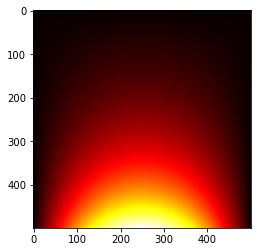

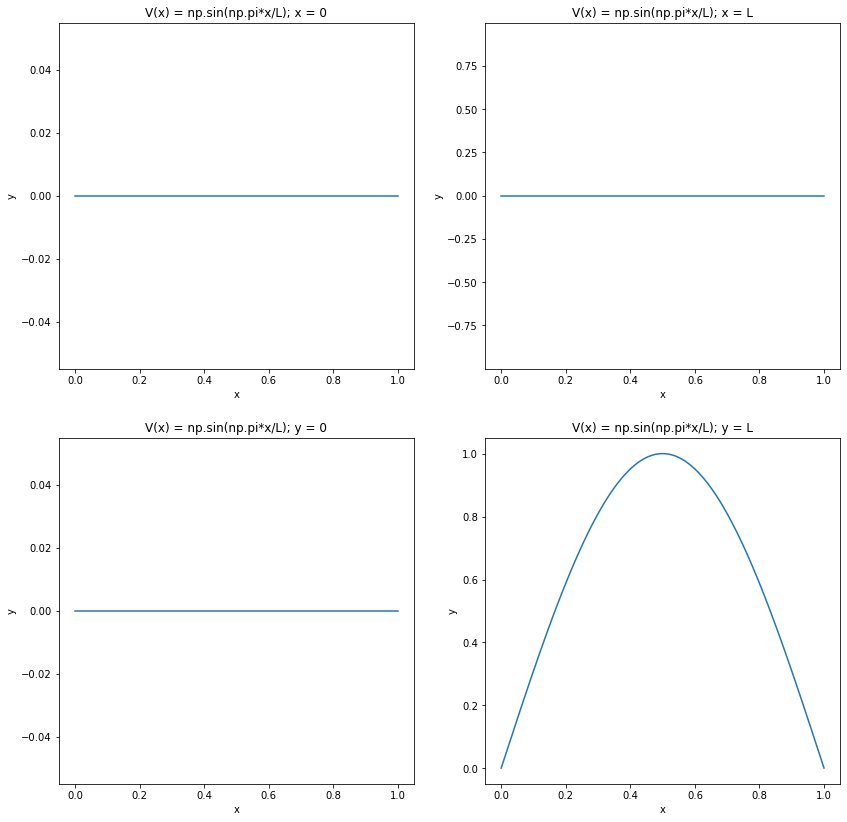

In [82]:
sol1 = fourier_solve(V1,N, title = "V(x) = np.sin(np.pi*x/L)")

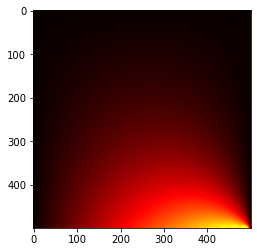

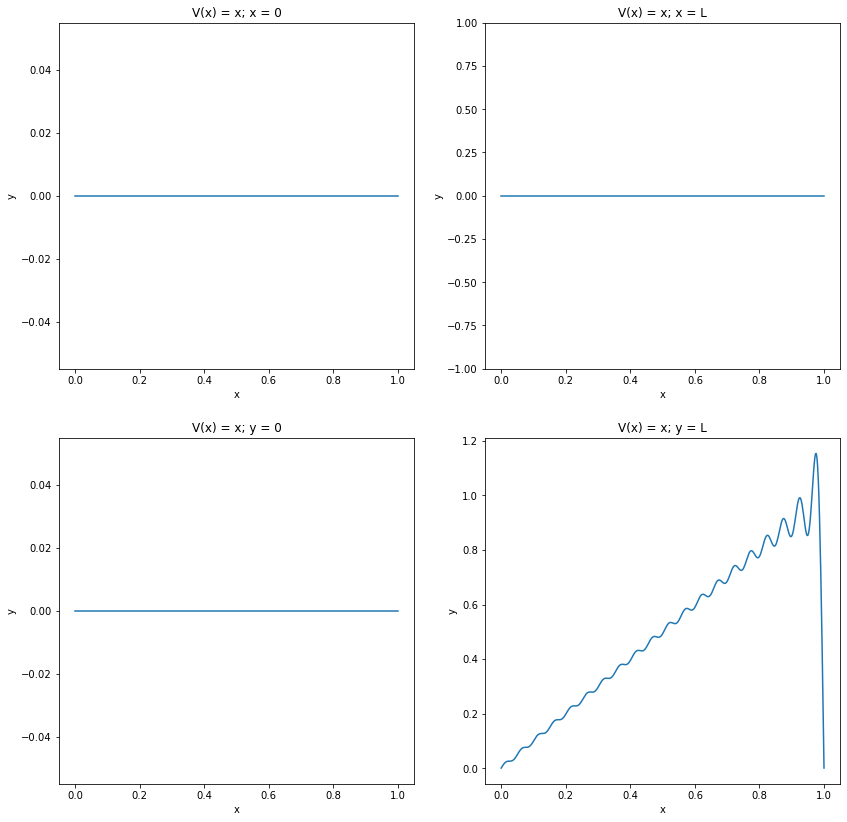

In [83]:
sol2 = fourier_solve(V2,N,title = "V(x) = x")

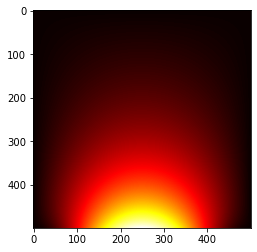

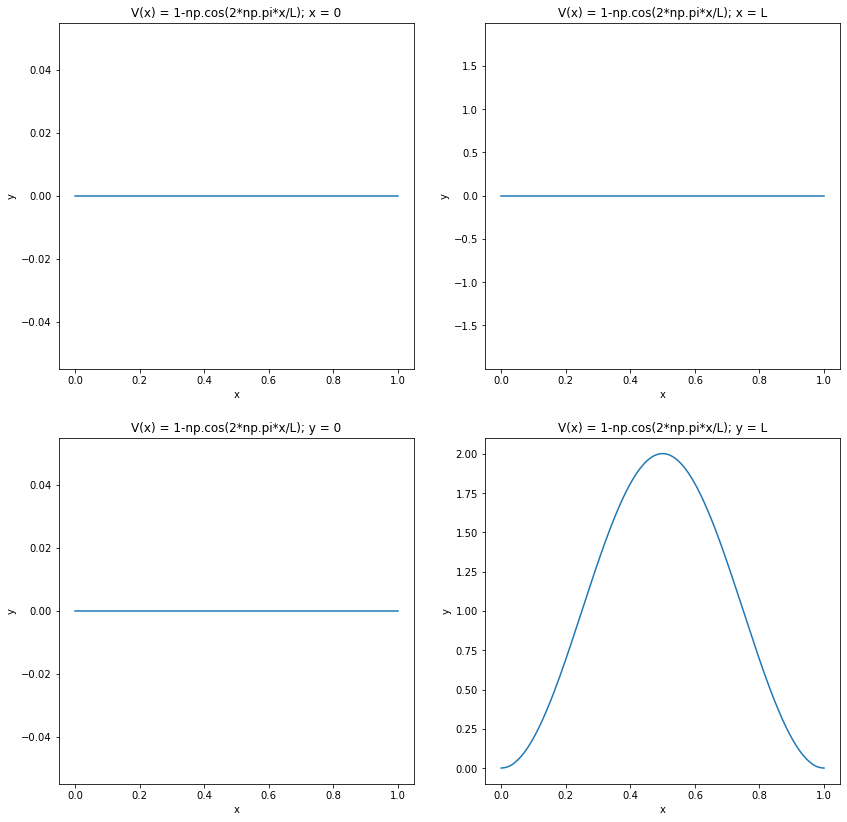

In [84]:
sol3 = fourier_solve(V3,N,title = "V(x) = 1-np.cos(2*np.pi*x/L)")

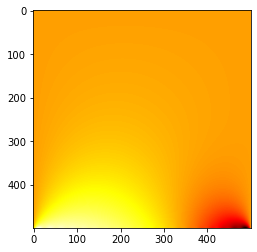

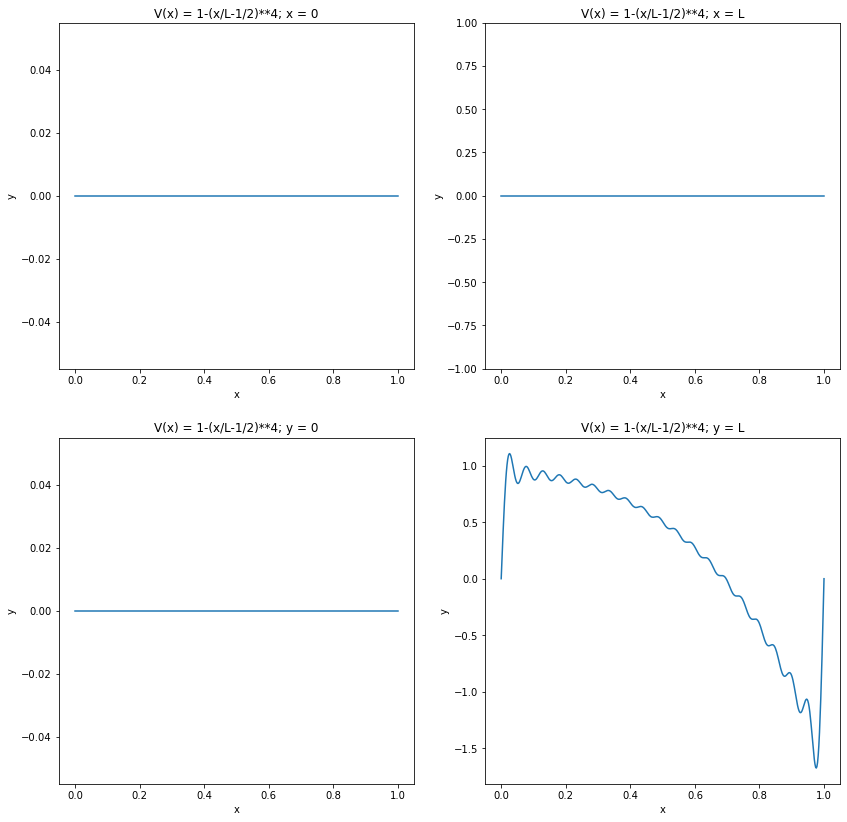

In [85]:
sol4 = fourier_solve(V4,N,title = "V(x) = 1-(x/L-1/2)**4")

### A look at convergence

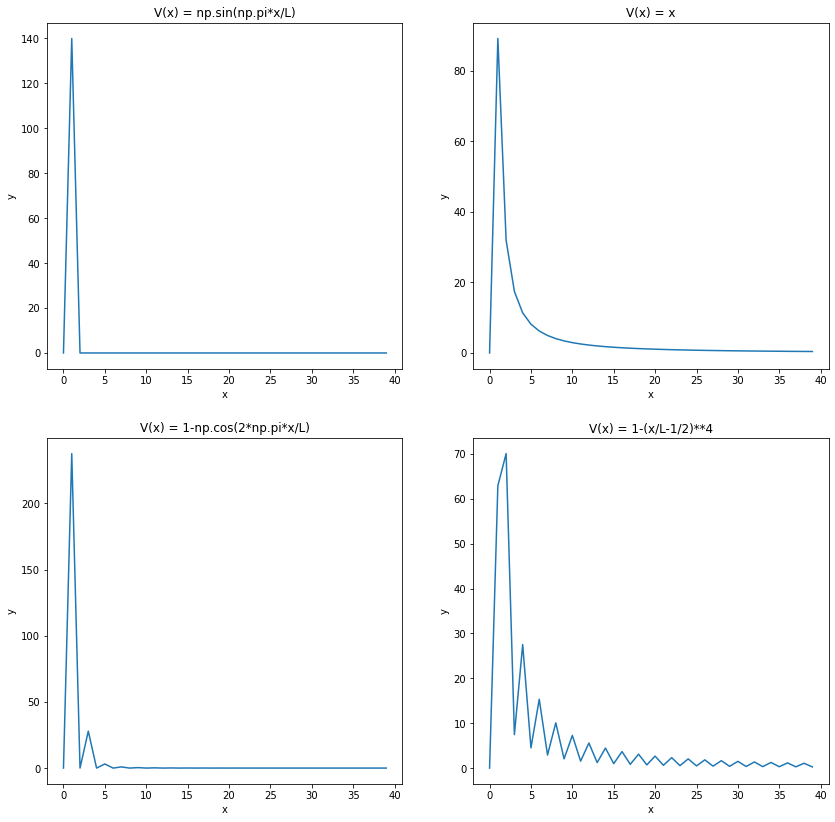

In [86]:
def plot_convergence(sols):
    terms = range(0,N)
    sols_convergence = np.zeros(N)
    for count,sol in enumerate(sols):
        norm = np.linalg.norm(sol)
        sols_convergence[count] = norm
    return terms,sols_convergence


terms1,sols_convergence1 = plot_convergence(sol1)
terms2,sols_convergence2 = plot_convergence(sol2)
terms3,sols_convergence3 = plot_convergence(sol3)
terms4,sols_convergence4 = plot_convergence(sol4)
fig, ax = plt.subplots(2,2, figsize = (14,14))

ax[0,0].title.set_text("V(x) = np.sin(np.pi*x/L)")
ax[0,0].set_xlabel("x")
ax[0,0].set_ylabel("y")
ax[0,0].plot(terms1,sols_convergence1)

ax[0,1].title.set_text("V(x) = x")
ax[0,1].set_ylabel("y")
ax[0,1].set_xlabel("x")
ax[0,1].plot(terms2,sols_convergence2)


ax[1,0].title.set_text("V(x) = 1-np.cos(2*np.pi*x/L)")
ax[1,0].set_ylabel("y")
ax[1,0].set_xlabel("x")
ax[1,0].plot(terms3,sols_convergence3)

ax[1,1].title.set_text("V(x) = 1-(x/L-1/2)**4")
ax[1,1].set_ylabel("y")
ax[1,1].set_xlabel("x")
ax[1,1].plot(terms4,sols_convergence4)

### Calcualting and plotting E-fields corresponding som potentials calculated

We use the formula $E = -\nabla V$, which in its descrete case with finite differences equals to $E_{yij} = -\frac{V_{i+1,j}-V_{i-1,j}}{\Delta y}$ and $E_{xij} = -\frac{V_{i,j+1}-V_{i,j-1}}{\Delta x}$ by the dobbel step method.

In [87]:
def E_field(V):
    delta = L/M
    Ex = -(V[1:M-1,2:M]-V[1:M-1,0:M-2])
    Ey = -(V[2:M,1:M-1]-V[0:M-2,1:M-1])
    return Ex/delta,Ey/delta

###### Plotting for the different test-functions

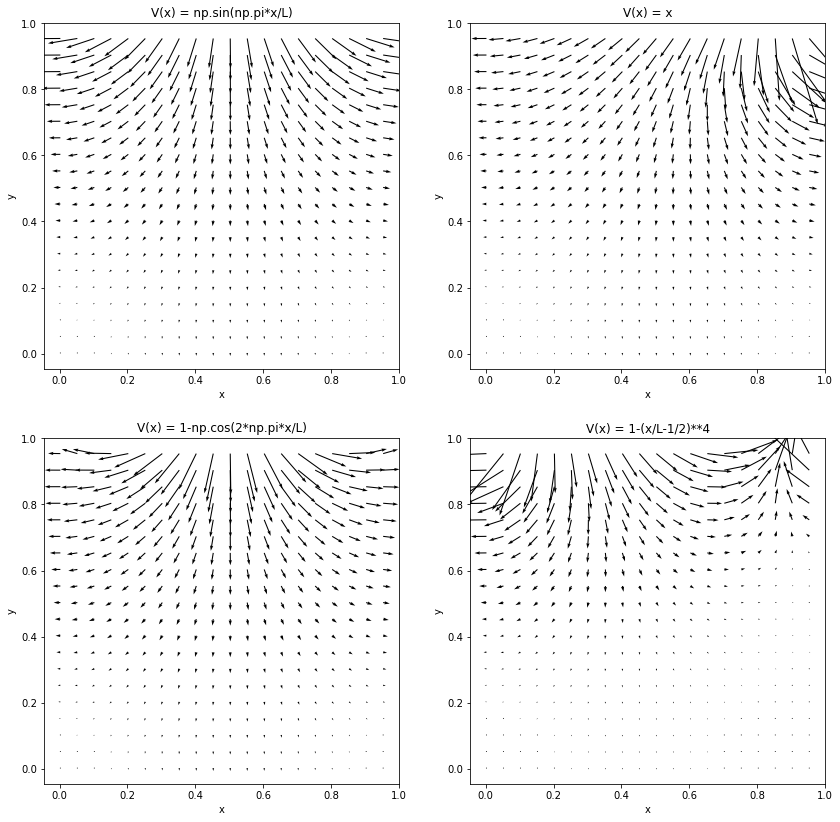

In [88]:
Ex1,Ey1 = E_field(sum(sol1))
Ex2,Ey2 = E_field(sum(sol2))
Ex3,Ey3 = E_field(sum(sol3))
Ex4,Ey4 = E_field(sum(sol4))

xs = ys = np.linspace(0,L,M)[1:M-1:M//20]

fig, ax = plt.subplots(2,2, figsize = (14,14))

ax[0,0].title.set_text("V(x) = np.sin(np.pi*x/L)")
ax[0,0].set_xlabel("x")
ax[0,0].set_ylabel("y")
ax[0,0].quiver(xs,ys,Ex1[::M//20,::M//20],Ey1[::M//20,::M//20])


ax[0,1].title.set_text("V(x) = x")
ax[0,1].set_ylabel("y")
ax[0,1].set_xlabel("x")
ax[0,1].quiver(xs,ys,Ex2[::M//20,::M//20],Ey2[::M//20,::M//20])


ax[1,0].title.set_text("V(x) = 1-np.cos(2*np.pi*x/L)")
ax[1,0].set_ylabel("y")
ax[1,0].set_xlabel("x")
ax[1,0].quiver(xs,ys,Ex3[::M//20,::M//20],Ey3[::M//20,::M//20])

ax[1,1].title.set_text("V(x) = 1-(x/L-1/2)**4")
ax[1,1].set_ylabel("y")
ax[1,1].set_xlabel("x")
ax[1,1].quiver(xs,ys,Ex4[::M//20,::M//20],Ey4[::M//20,::M//20])

plt.show()